In [10]:
#Question 1: Read the Bike Details dataset into a Pandas DataFrame and display its
#first 10 rows.

from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

print("📁 Please select your BIKE-DETAILS.csv file when prompted...")
uploaded = files.upload()

df = pd.read_csv('BIKE DETAILS.csv')
print("First 10 rows:")
print(df.head(10))
print(f"Shape: {df.shape}")
print(f"Columns: {list(df.columns)}")



📁 Please select your BIKE-DETAILS.csv file when prompted...


Saving BIKE DETAILS.csv to BIKE DETAILS (2).csv
First 10 rows:
                                   name  selling_price  year seller_type  \
0             Royal Enfield Classic 350         175000  2019  Individual   
1                             Honda Dio          45000  2017  Individual   
2   Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3     Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
4                 Yamaha SZ [2013-2014]          20000  2011  Individual   
5                      Honda CB Twister          18000  2010  Individual   
6                  Honda CB Hornet 160R          78500  2018  Individual   
7  Royal Enfield Bullet 350 [2007-2011]         180000  2008  Individual   
8                Hero Honda CBZ extreme          30000  2010  Individual   
9                    Bajaj Discover 125          50000  2016  Individual   

       owner  km_driven  ex_showroom_price  
0  1st owner        350                NaN  
1  1st own

In [11]:
#Question 2: Check for missing values in all columns and describe your approach for
#handling them.

missing_values = df.isnull().sum()
print("Missing values:")
print(missing_values)
print("Percentage missing:")
print((missing_values / len(df)) * 100)


Missing values:
name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64
Percentage missing:
name                  0.000000
selling_price         0.000000
year                  0.000000
seller_type           0.000000
owner                 0.000000
km_driven             0.000000
ex_showroom_price    40.999057
dtype: float64


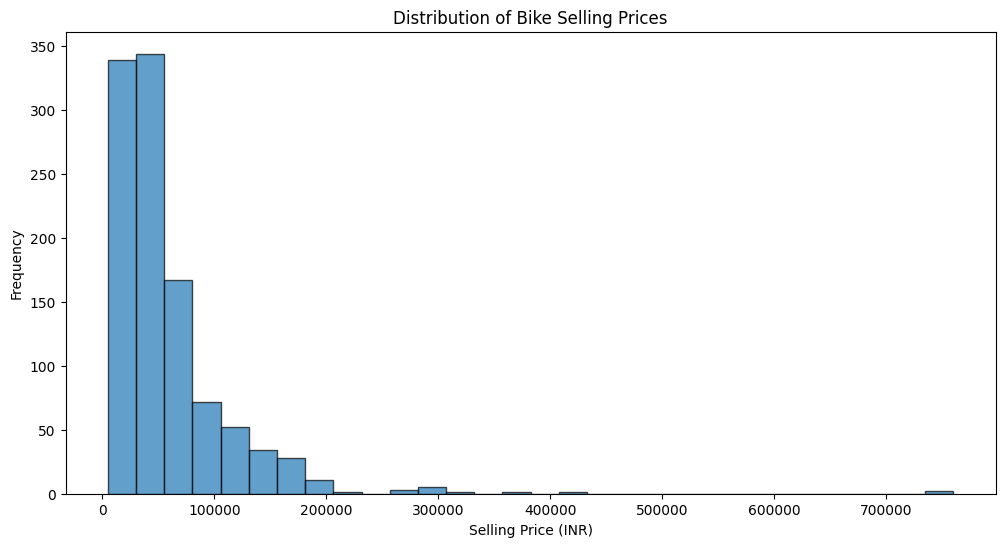

count      1061.000000
mean      59638.151744
std       56304.291973
min        5000.000000
25%       28000.000000
50%       45000.000000
75%       70000.000000
max      760000.000000
Name: selling_price, dtype: float64


In [12]:
#Question 3: Plot the distribution of selling prices using a histogram and describe the
#overall trend.

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.hist(df['selling_price'], bins=30, edgecolor='black', alpha=0.7)
plt.title('Distribution of Bike Selling Prices')
plt.xlabel('Selling Price (INR)')
plt.ylabel('Frequency')
plt.show()
print(df['selling_price'].describe())



seller_type
Dealer        46666.666667
Individual    59711.923223
Name: selling_price, dtype: float64


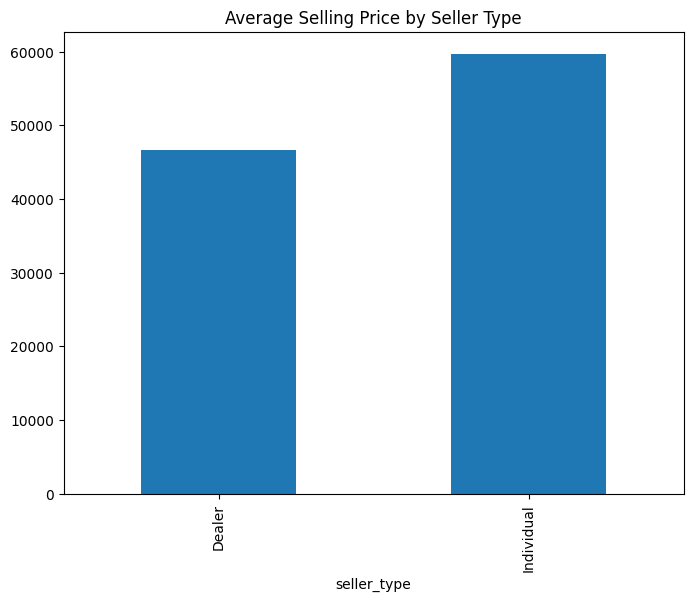

In [13]:
#Question 4: Create a bar plot to visualize the average selling price for each seller_type
#and write one observation

avg_price = df.groupby('seller_type')['selling_price'].mean()
print(avg_price)

plt.figure(figsize=(8, 6))
avg_price.plot(kind='bar')
plt.title('Average Selling Price by Seller Type')
plt.show()


owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64


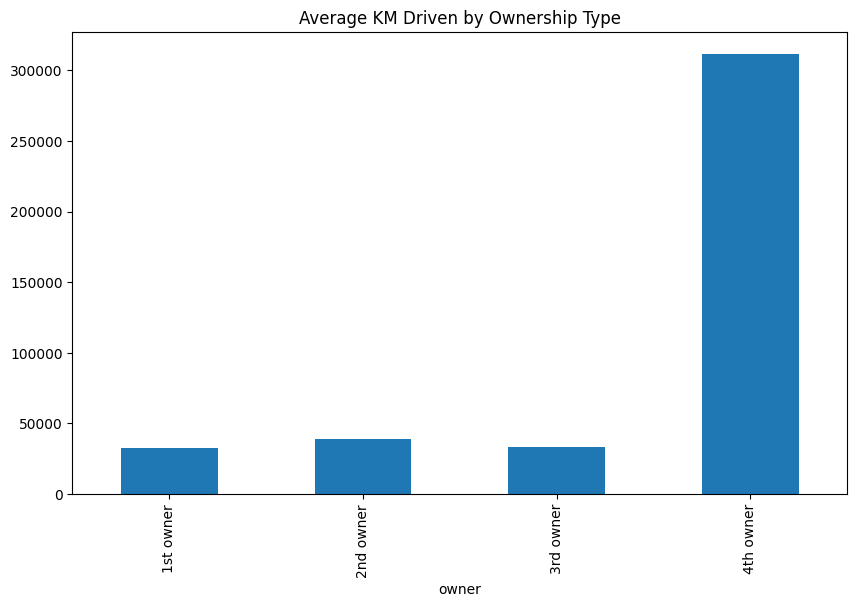

In [14]:
#Question 5: Compute the average km_driven for each ownership type (1st owner,
#2nd owner, etc.), and present the result as a bar plot

avg_km = df.groupby('owner')['km_driven'].mean()
print(avg_km)

plt.figure(figsize=(10, 6))
avg_km.plot(kind='bar')
plt.title('Average KM Driven by Ownership Type')
plt.show()


In [15]:
#Question 6: Use the IQR method to detect and remove outliers from the km_driven
#column. Show before-and-after summary statistics.

print("Before outlier removal:")
print(df['km_driven'].describe())

Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_clean = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]
print("After outlier removal:")
print(df_clean['km_driven'].describe())


Before outlier removal:
count      1061.000000
mean      34359.833176
std       51623.152702
min         350.000000
25%       13500.000000
50%       25000.000000
75%       43000.000000
max      880000.000000
Name: km_driven, dtype: float64
After outlier removal:
count     1022.000000
mean     28203.415851
std      19552.083583
min        350.000000
25%      13000.000000
50%      24000.000000
75%      40000.000000
max      86000.000000
Name: km_driven, dtype: float64


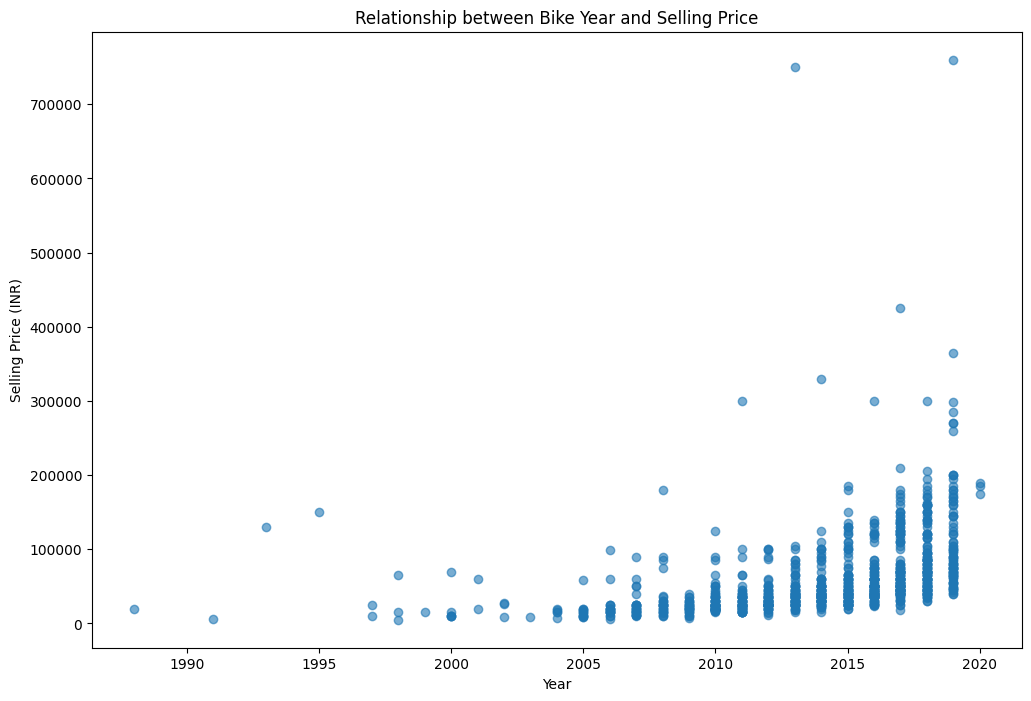

Correlation: 0.4022


In [16]:
#Question 7: Create a scatter plot of year vs. selling_price to explore the
#relationship between a bike's age and its price.

plt.figure(figsize=(12, 8))
plt.scatter(df['year'], df['selling_price'], alpha=0.6)
plt.title('Relationship between Bike Year and Selling Price')
plt.xlabel('Year')
plt.ylabel('Selling Price (INR)')
plt.show()

correlation = df['year'].corr(df['selling_price'])
print(f"Correlation: {correlation:.4f}")


In [17]:
#Question 8: Convert the seller_type column into numeric format using one-hot
#encoding. Display the first 5 rows of the resulting DataFrame.

encoded = pd.get_dummies(df['seller_type'], prefix='seller_type')
df_encoded = pd.concat([df.drop('seller_type', axis=1), encoded], axis=1)
print("First 5 rows with encoding:")
print(df_encoded.head())


First 5 rows with encoding:
                                  name  selling_price  year      owner  \
0            Royal Enfield Classic 350         175000  2019  1st owner   
1                            Honda Dio          45000  2017  1st owner   
2  Royal Enfield Classic Gunmetal Grey         150000  2018  1st owner   
3    Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  1st owner   
4                Yamaha SZ [2013-2014]          20000  2011  2nd owner   

   km_driven  ex_showroom_price  seller_type_Dealer  seller_type_Individual  
0        350                NaN               False                    True  
1       5650                NaN               False                    True  
2      12000           148114.0               False                    True  
3      23000            89643.0               False                    True  
4      21000                NaN               False                    True  


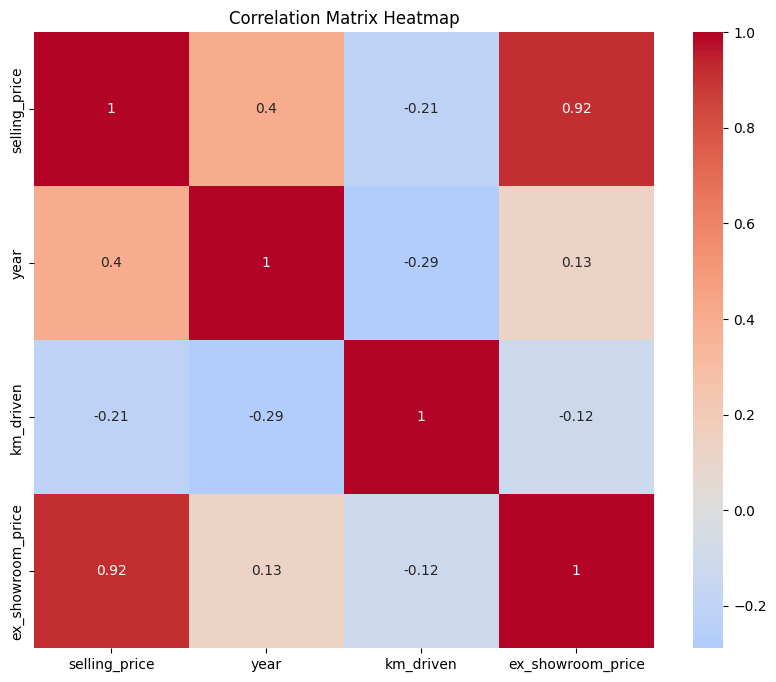

In [18]:
#Question 9: Generate a heatmap of the correlation matrix for all numeric columns.
#What correlations stand out the most?

import seaborn as sns

numeric_cols = df.select_dtypes(include=[np.number]).columns
corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heatmap')
plt.show()


In [19]:
#Question 10: Summarize your findings in a brief report:
#● What are the most important factors affecting a bike's selling price?
#● Mention any data cleaning or feature engineering you performed.

print("Key Factors Affecting Price:")
print(f"1. Year correlation: {df['year'].corr(df['selling_price']):.4f}")
print(f"2. KM driven correlation: {df['km_driven'].corr(df['selling_price']):.4f}")

print("Seller type impact:")
print(df.groupby('seller_type')['selling_price'].mean())

print("Owner type impact:")
print(df.groupby('owner')['selling_price'].mean())



Key Factors Affecting Price:
1. Year correlation: 0.4022
2. KM driven correlation: -0.2129
Seller type impact:
seller_type
Dealer        46666.666667
Individual    59711.923223
Name: selling_price, dtype: float64
Owner type impact:
owner
1st owner     60022.813853
2nd owner     55666.658537
3rd owner     55727.272727
4th owner    118333.333333
Name: selling_price, dtype: float64
